In [1]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

In [15]:
h = [0.9120, 0.9860, 1.0600, 1.1300, 1.1900, 1.2600, 1.3200, 1.3800, 1.4100, 1.4900]
w = [13.7, 15.9, 18.5, 21.3, 23.5, 27.2, 32.7, 36.0, 38.6, 43.7]
len(h)==len(w)

True

In [3]:
def powerFun(params, x_data, y_data):
    a, b = params
    model = a*(x_data**b)
    return model - y_data

initial_params = [5, 6] #randomly chosen initial guess

true_params = [16.3, 2.42]

result = least_squares(powerFun, initial_params, args=(h,w), method='lm')

optimized_params = result.x

print('Optimized parameters: ', optimized_params)


Optimized parameters:  [15.88537241  2.53359363]


In [17]:
appr_w = [optimized_params[0]*(x**optimized_params[1]) for x in h]
print(appr_w)
len(appr_w)==len(w)

[12.578839559842875, 15.327947046937798, 18.412475408092735, 21.650932554311716, 24.683270410677146, 28.529592907233088, 32.0983527165075, 35.924783811465076, 37.93656409179248, 43.62957952728645]


True

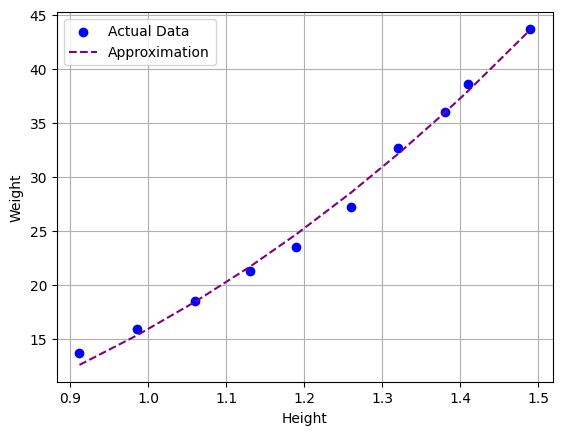

In [6]:
plt.figure()
plt.scatter(h, w, label='Actual Data', color = 'blue', marker='o')
plt.plot(h, appr_w, label='Approximation', color = 'purple', linestyle='--')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
rmse = 0

for M, m in zip(w, appr_w):
  rmse+=(M-m)**2
rmse = np.sqrt(rmse/len(w))

print('Here is the RMSE of the approximation: ', rmse)

Here is the RMSE of the approximation:  0.7547018527419523
